<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/ScalarBackpropAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns 
import imageio 
from IPython.display import  HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["Red","Yellow","Green"])
np.random.seed(0)

#Generating Data and Plotting

In [0]:
data , labels = make_blobs(n_samples=1000, n_features =2, centers=4,random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


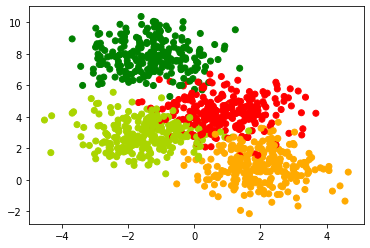

In [0]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
labels_original = labels 
labels = np.mod(labels_original,2)

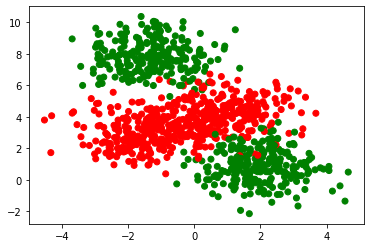

In [0]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
X_train,X_val,Y_train,Y_val = train_test_split(data,labels,stratify=labels,random_state=0)

#Scalar Feed Farward 

In [0]:
class FirstFeedForward():

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0 
    self.b2 = 0 
    self.b3 = 0 

  def sigmoid(self,x):
    return (1 / (1 + np.exp(-x)))

  def forwardPass(self,x):
    self.x1, self.x2 =x 
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1) 
    self.a2 = self.w3*self.x1 + self.w4 * self.x2 + self.b2 
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3 
    self.h3 = self.sigmoid(self.a3)
    return self.h3 

  def grad(self,x,y):
    self.forwardPass(x)

    self.dw5 = (self.h3 - y ) * self.h3 * (1 - self.h3) * self.h1 
    self.dw6 = (self.h3 - y ) * self.h3 * (1 - self.h3) * self.h2
    self.b3  = (self.h3 - y)  * self.h3 * (1 - self.h3)

    self.dw1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.dw5 * self.h1 * (1 - self.h1) * self.x1 
    self.w2  = (self.h3 - y) * self.h3 * (1 - self.h3) * self.dw5 * self.h1 * (1 - self.h1) * self.x2 
    self.b1  = (self.h3 - y) * self.h3 * (1 - self.h3) * self.dw5 * self.h1 * (1- self.h1)

